In [2]:
from sklearn.datasets import load_boston #Carrega o dicionário
boston = load_boston()
boston.keys() #Quais informações possui esse dicionário


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR) #Mostra a descrição do dicionário, com os significados das siglas e etc....
print(boston.filename) #Mostra onde o arquivo está sendo armazenado no SO

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(boston.feature_names) #Mostra as siglas das características exibidas no "boston.DESCR"

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
X, y = boston.data, boston.target #Atribui para X os valores das amostras e características e os resultados armazena na variável y
#X Se colocar somente a variável e colocar para executar, mostra o que é aquela variável (array...)
#type(X) utilizado para saber o tipo de uma determinada variável
X.shape, y.shape

((506, 13), (506,))

In [23]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


0


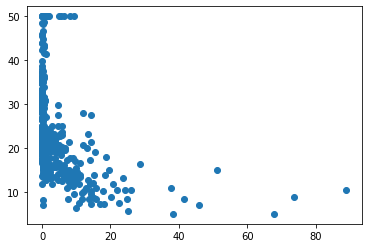

1


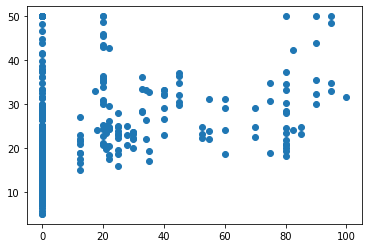

2


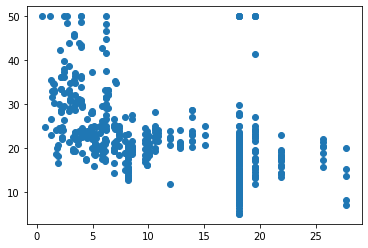

3


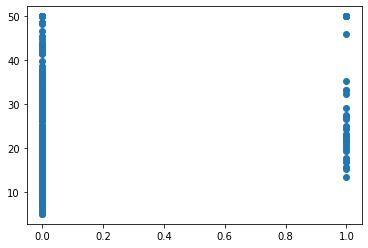

4


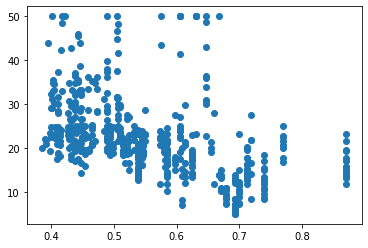

5


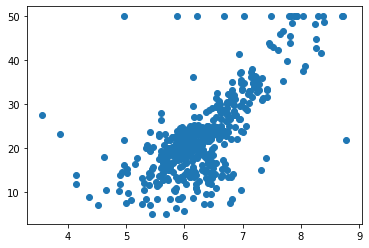

6


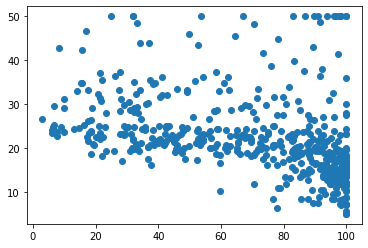

7


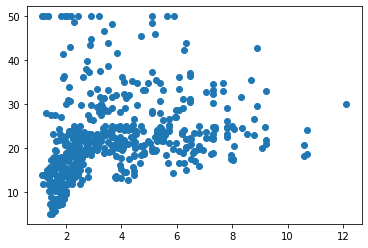

8


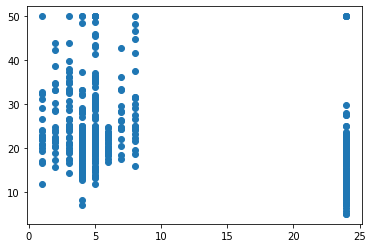

9


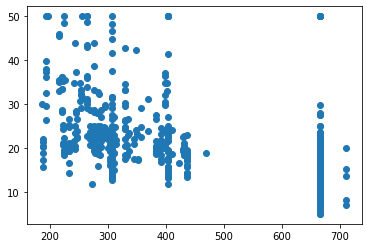

10


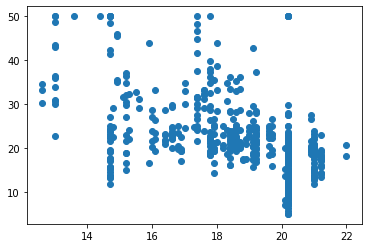

11


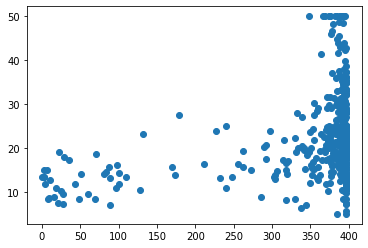

12


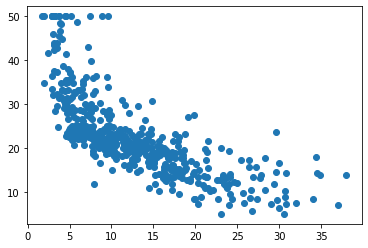

In [7]:
import matplotlib.pylab as plt
for i in range(X.shape[1]): #Varrer por todo o Array
    print(i) #imprime a posção da característica
    plt.scatter(X[:,i], y) #Vai plotar um gráfico de X contra o y
    plt.show() # Exibe um gráfico para cada característica

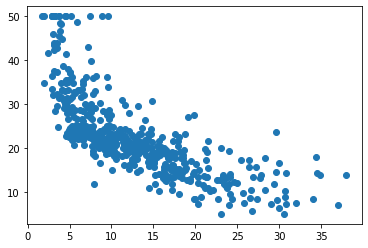

In [8]:
X12 = X[:,12:13] #Atribuindo uma variável, X12, à característica que será utilizada. Aproveita e mantém uma característica de matriz com o parâmetro "12:13", ao invés de retornar apenas um vetor
plt.scatter (X12, y) #Plota somente o X12
plt.show() #Comando para exibir

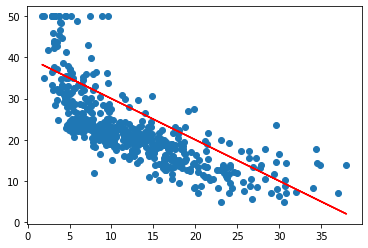

In [9]:
def modelo_linear(X, a, b): #Configura um modelo para ser utilizado, utilizando variáveis que irão representar uma função
    y = a*X + b #Definição de função
    return y
ypred = modelo_linear(X12, -1, 40) #O "ypred" recebe o resultado. O "-1" indica que será uma reta descendente e o "40" representa onde será o "corte" no eixo y
plt.scatter(X12, y) #Exibindo as amostras do X12 contra os resultados no eixo y
plt.plot(X12, ypred, 'r') #Plota no gráfico as amostras do X12, com a função descendente do "ypred", na cor "vermelha" (r).
plt.show() #Somente para exibição do gráfico

In [10]:
#Avaliar (estimar) se o "modelo_linear" é bom pelo cálculo do Erro Absoluto Médio (Mean Absolute Error) - MAE, não tem derivada em todos seus pontos
def mae(y, ypred):
    yDiff = ypred - y.reshape(-1,1) #Calcular a diferença (yDiff) , porém o "y" é um Numpy array, então usa-se o "reshape" para transformar em uma matriz (-1,1)
    yAbs = abs(yDiff) #Calcula o valor absoluto
    errorSum = sum(yAbs) #Faz a soma dos erros
    mae = errorSum/len(yAbs)#Divide pelo tamanho
    return mae
ypred = modelo_linear(X12, -1, 40)# Utiliza o modelo_linear criado para criar o "ypred"
mae(y, ypred) #Cálculo do erro pela função definida

array([6.96547431])

In [11]:
#Avaliar (estimar) se o "modelo_linear" é bom pelo cálculo do Erro Quadrático Médio (Mean Square Error) - MSE, ela tem o mínimo global e é derivável em todos os pontos
def mse(y, ypred):
    yDiff = ypred - y.reshape(-1,1) #Cálcula a diferença do erro
    yDiffSquare = yDiff**2 #Eleva ao quadrado
    errorSum = sum(yDiffSquare)#Faz a soma dos erros
    mse = errorSum/len(yDiffSquare)#Calcula o MSE pegandoa  soma do erro
    return mse

ypred = modelo_linear(X12, -1, 40)
mse(y, ypred)

array([61.78580296])

In [12]:
#Avaliar (estimar) se o "modelo_linear" é bom pelo cálculo da Raiz do Erro Quadrático Médio (Root Mean Square Error) - RMSE, derivável em todos os pontos
from math import sqrt #Quase igual ao anterior, porém aplica-se a raiz quadrada
def rmse(y, ypred):
    yDiff = ypred - y.reshape(-1,1) 
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return sqrt(mse)# <<<<------- Raiz quadrada sendo aplicada

ypred = modelo_linear(X12, -1, 40)
rmse(y, ypred)

7.860394580708203

In [13]:
#Fazer o RMSE a partir do MSE utilizando o scikit-learn, mais otimizado que fazer da forma anterior. RECOMENDADO UTILIZAR ESTE!!!
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, ypred):
    mse = mean_squared_error(y, ypred)
    return sqrt(mse)
ypred = modelo_linear(X12, -1, 40)
rmse(y, ypred)

7.860394580708203

24.334069059572577
6.20346413306178


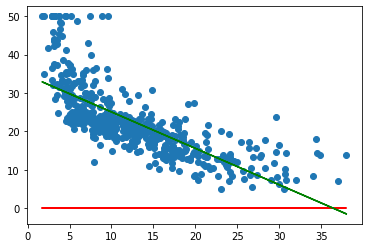

(-0.9500317226790728, 34.55355094057261)

In [14]:
from sklearn.metrics import mean_squared_error
class regressao_linear():
    def __init__(self):
        self.a = 0
        self.b = 0
    def fit(self, X,y):
        for _ in range(500):
            #self.a = -1
            #self.b = 40
            ypred = self.predict(X)#Primeiro entender o quão ruim está a solução
            erro = ypred - y.reshape(-1,1) #Calcular o erro e saber se ele está positivo ou negativo
            #print(sum(erro)/len(erro))
            ajusteB = sum(erro)/len(erro)
            self.b = self.b - 0.1*ajusteB[0]
            #print(ajusteB)
            
            ajusteA = sum([erro[i] *X[i] for i in range(X.shape[0])]) /sum(X)
            #print(ajusteA)
            self.a = self.a - 0.1*ajusteA[0]
            
            #ypred = self.predict(X)
            #erro = ypred - y.reshape(-1,1)
            #print(mean_squared_error(y, ypred))

    def predict(self, X):#Predizer os rótulos de uma base de dados dada como entrada (X)
        y = self.a*X + self.b #Y é o rótulo
        return y

plt.scatter(X12, y) #Irá plotar um vetor da matriz (X12) e os rótulos (y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
#print(mean_squared_error(y, ypred)) ---> Substituindo pelo rmse
print(rmse(y, ypred))
plt.plot(X12, ypred, 'r') #Forma a linha vermelha

modelo.fit(X12, y) #Criando um modelo que possa ser treinado
ypred = modelo.predict(X12)
#print(mean_squared_error(y, ypred)) ---> Substituindo pelo rmse
print(rmse(y, ypred))
plt.plot(X12, ypred, 'g')#Forma a linha verde

plt.show()

modelo.a, modelo.b


24.334069059572577
6.20346413306178


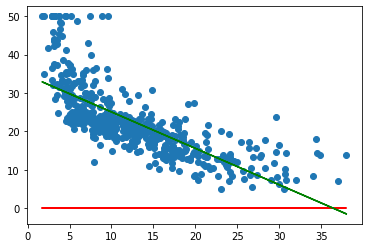

array([[34.55355094],
       [-0.95003172]])

In [15]:
############################################Aproveitando o código anterior para vetorizar o modelo intuitivo anterior
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1)) #Criando com 2 colunas e uma linha composta por zeros
        
    @staticmethod #addBias é estático pois ele não tem nenhuma informação do objeto
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

        self.a = 0
        self.b = 0
    def fit(self, X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            #self.a = -1
            #self.b = 40
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)

            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste #Faz o ajuste de a e b ao mesmo tempo

            #print(sum(erro)/len(erro))
            #ajusteB = sum(erro)/len(erro)
            #self.b = self.b - 0.1*ajusteB[0]
            #print(ajusteB)
            
            #ajusteA = sum([erro[i] *X[i] for i in range(X.shape[0])])/sum(X)
            #print(ajusteA)
            #self.a = self.a - 0.1*ajusteA[0]
            
            #ypred = self.predict(X)
            #erro = ypred - y.reshape(-1,1)
            #print(mean_squared_error(y, ypred))

    def predict(self, X):#Predizer os rótulos de uma base de dados dada como entrada (X)
        X_b = self.addBias(X)
        #y = self.w[1]*X[1] + self.w[0]*X[0] #Y é o rótulo
        y = X_b.dot(self.w) #Fazer uma multiplicação linear
        return y

plt.scatter(X12, y) #Irá plotar um vetor da matriz (X12) e os rótulos (y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
#print(mean_squared_error(y, ypred)) ---> Substituindo pelo rmse
print(rmse(y, ypred))
plt.plot(X12, ypred, 'r') #Forma a linha vermelha

modelo.fit(X12, y)
ypred = modelo.predict(X12)
#print(mean_squared_error(y, ypred)) ---> Substituindo pelo rmse
print(rmse(y, ypred))
plt.plot(X12, ypred, 'g')#Forma a linha verde

plt.show()

#modelo.a, modelo.b
modelo.w

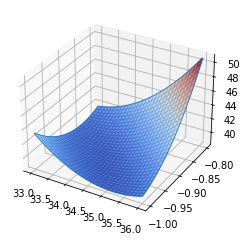

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
w0 = np.linspace(33, 36, 30) #o 33 e o 36 é o iintervalo que contém o resultado anterior (34.55355094). 30 é a quantidade de amostras que serão produzidas.
w1 = np.linspace(-1, -0.8, 30) #o -1 e o -0.8 é o iintervalo que contém o resultado anterior (0.95003172). 30 é a quantidade de amostras que serão produzidas.

def z_function(W0, W1): #definindo a função
    modelo = regressao_linear()# cria o modelo de regressão linear
    Erro = np.empty(W0.shape) # O Erro será uma matriz, podendo ser do do numpy.  O shape será igual ao das outras duas W0 ou W1
    for j in range(Erro.shape[0]):# Percorrer o j
            for k in range(Erro.shape[1]): #Percorrer o j
                modelo.w[0] = W0[j][k] #Modelo será atualizado de acordo com os valores de W0 que foram gerados no meshgrid
                modelo.w[1] = W1[j][k]#Modelo será atualizado de acordo com os valores de W1 que foram gerados no meshgrid
                ypred = modelo.predict(X12) #Fazer a predição do modelo com o X12, que é uma variável global
                mse = mean_squared_error(y, ypred) #Calcular o MSE, que é a função que está sendo reduzida                
                Erro[j][k] = mse
    return Erro #Retorna o erro após todas as iterações
    


ax = plt.axes(projection="3d") # Adicionar um eixo. Fazer uma projeção 3d
W0, W1 = np.meshgrid(w0, w1) # meshgrid irá criar duas matrizes e jogar em W0 e W1
Erro = z_function(W0,W1) #Fazer a matriz com os erros, que vai plotar o eixo z

##Agora precisa plotar os resultados

ax.plot_wireframe (W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm', edgecolor='none')

plt.show()

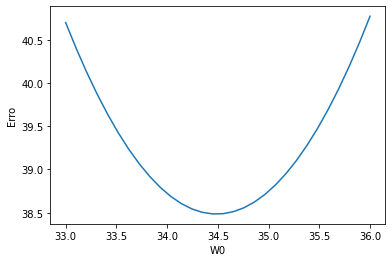

In [17]:
####Fazendo o gráfico 2D para o W0
plt.ylabel("Erro") # Indicador, no gráfico, do que significa o eixo Y 
plt.xlabel("W0") # Indicador, no gráfico, do que significa o eixo X
i=8 #????A coluna 8 fica interessante para visualizar????
plt.plot(W0[i,:], Erro[i,:]) # Serão plotadas todos os valores da coluna 8 e o Erro correspondente a essa coluna 8
plt.show() # Exibir o gráfico

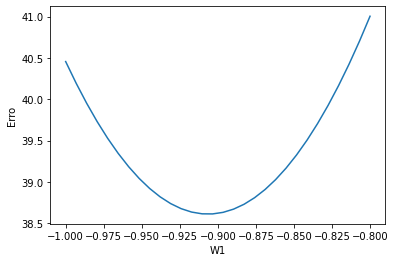

In [18]:
####Fazendo o gráfico 2D para o W1
plt.ylabel("Erro") # Indicador, no gráfico, do que significa o eixo Y 
plt.xlabel("W1") # Indicador, no gráfico, do que significa o eixo X
i=8 #????A coluna 8 fica interessante para visualizar????
plt.plot(W1[:,i], Erro[:,i]) # Serão plotadas todos os valores da coluna 8 e o Erro correspondente a essa coluna 8
plt.show() # Exibir o gráfico

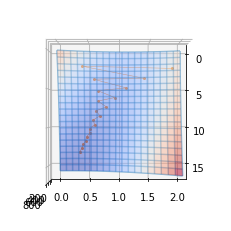

In [19]:
############################################Aproveitando o código anterior para algumas mudanças
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
    def __init__(self):
        self.w = np.zeros((2,1)) #Criando com 2 colunas e uma linha composta por zeros
        self.wh = [] #<<<<<<<<<<<<<<<<<<<<--------------------------------------------------------- Adicionar nos campos da classe uma lista vazia
        
    @staticmethod #addBias é estático pois ele não tem nenhuma informação do objeto
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

        self.a = 0
        self.b = 0
    def fit(self, X,y):
        X_b = self.addBias(X)
        for _ in range(20):#<<<<<<<<<<<<<<<<<<<<--------------------------------------------------------- Somente 20 iterações
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)

            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste #Faz o ajuste de a e b ao mesmo tempo
            ypred = self.predict(X)
            mse = mean_squared_error(y, ypred) #<<<<<<<<<<<<<<<<------------------------------ Toda vez que calcular o erro quadrático médio depois do ajuste
            self.wh.append([self.w[0,0], self.w[1,0], mse]) #<<<<<<<<<------------------------ Adicionar ao w.h ("W history"), esse seria o histórico do ajuste

    def predict(self, X):#Predizer os rótulos de uma base de dados dada como entrada (X)
        X_b = self.addBias(X)
        y = X_b.dot(self.w) #Fazer uma multiplicação linear
        return y

w0 = np.linspace(0, 16, 20) #<<<<<<<<<--------------------------Pegando erros mais gerais e mais complicados, apenas de 0 à 16 com os 20 elemnentos
w1 = np.linspace(0, 2, 20)  #<<<<<<<<<--------------------------Pegando erros mais gerais e mais complicados, apenas de 0 à 2 com os 20 elemnentos

def z_function(W0, W1): #definindo a função
    modelo = regressao_linear()# cria o modelo de regressão linear
    Erro = np.empty(W0.shape) # O Erro será uma matriz, podendo ser do do numpy.  O shape será igual ao das outras duas W0 ou W1
    for j in range(Erro.shape[0]):# Percorrer o j
            for k in range(Erro.shape[1]): #Percorrer o j
                modelo.w[0] = W0[j][k] #Modelo será atualizado de acordo com os valores de W0 que foram gerados no meshgrid
                modelo.w[1] = W1[j][k]#Modelo será atualizado de acordo com os valores de W1 que foram gerados no meshgrid
                ypred = modelo.predict(X12) #Fazer a predição do modelo com o X12, que é uma variável global
                mse = mean_squared_error(y, ypred) #Calcular o MSE, que é a função que está sendo reduzida                
                Erro[j][k] = mse
    return Erro #Retorna o erro após todas as iterações
    


ax = plt.axes(projection="3d") # Adicionar um eixo. Fazer uma projeção 3d
W0, W1 = np.meshgrid(w0, w1) # meshgrid irá criar duas matrizes e jogar em W0 e W1
Erro = z_function(W0,W1) #Fazer a matriz com os erros, que vai plotar o eixo z

##Agora precisa plotar os resultados

ax.plot_wireframe (W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5, cmap='coolwarm', edgecolor='none')

modelo = regressao_linear() #<<<<<<<<<--------------------------Criando o modelo que irá receber a nova regressão linear
modelo.fit(X12,y)
ypred = modelo.predict(X12)
wh = np.array(modelo.wh) 
ax.plot(wh[:,0],wh[:,1], wh[:,2], marker='o', linewidth='0.5', markersize=2)#<<<<<<<<<--------------------------O termo ":" significa todas, no caso seria todas as linhas de uma determinada coluna, ou seja, "0" a primeira, "1" a segunda...
ax.view_init(azim=0, elev=90)#<<<<<<<<<--------------------------Colocando a visualização do gráfico de cima
 
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression # O próprio sklearn possui uma regressão linear considerada ótima
modelo = LinearRegression() #Recebe o LinearRegression
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred)) #Imprimindo o MSE
print(modelo.intercept_, modelo.coef_) #Imprime os parâmetros de uma forma diferente. O intercept é o bias e coef são os coeficientes

38.48296722989415
34.5538408793831 [-0.95004935]


In [21]:
from sklearn.linear_model import LinearRegression # O próprio sklearn possui uma regressão linear considerada ótima
modelo = LinearRegression() #Recebe o LinearRegression
modelo.fit(X, y) #<<<<<<<<<-------------------------- Tirando o X12 e utilizando todos os valores de X
ypred = modelo.predict(X)#<<<<<<<<<--------------------------Tirando o X12 e utilizando todos os valores de X
print(mean_squared_error(y, ypred)) #Imprimindo o MSE
print(modelo.intercept_, modelo.coef_) #Imprime os parâmetros de uma forma diferente. O intercept é o bias e coef são os coeficientes

21.894831181729202
36.45948838509028 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
